In [1]:
#Week 1: Explore and preprocess data
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# load data with pandas
df_train = pd.read_csv('final_train.csv')

#removing id column
df_train.drop("Id", axis=1, inplace=True)
# df_test.drop("Id", axis = 1, inplace=True)

#Deleting outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)


df_train["PoolQC"] = df_train["PoolQC"].fillna("None")

df_train["MiscFeature"] = df_train["MiscFeature"].fillna("None")

df_train["Alley"] = df_train["Alley"].fillna("None")

df_train["Fence"] = df_train["Fence"].fillna("None")

df_train["FireplaceQu"] = df_train["FireplaceQu"].fillna("None")


#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))


for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_train[col] = df_train[col].fillna('None')


for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_train[col] = df_train[col].fillna(0)


for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_train[col] = df_train[col].fillna(0)


for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_train[col] = df_train[col].fillna('None')


df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)


df_train['MSZoning'] = df_train['MSZoning'].fillna(df_train['MSZoning'].mode()[0])

df_train = df_train.drop(['Utilities'], axis=1)

df_train["Functional"] = df_train["Functional"].fillna("Typ")

df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

df_train['KitchenQual'] = df_train['KitchenQual'].fillna(df_train['KitchenQual'].mode()[0])

df_train['Exterior1st'] = df_train['Exterior1st'].fillna(df_train['Exterior1st'].mode()[0])
df_train['Exterior2nd'] = df_train['Exterior2nd'].fillna(df_train['Exterior2nd'].mode()[0])


df_train['SaleType'] = df_train['SaleType'].fillna(df_train['SaleType'].mode()[0])


df_train['MSSubClass'] = df_train['MSSubClass'].fillna("None")

#Check remaining missing values if any 
df_train_na = (df_train.isnull().sum() / len(df_train)) * 100
df_train_na = df_train_na.drop(df_train_na[df_train_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :df_train_na})
missing_data.head()



pd.set_option("display.max_rows", None, "display.max_columns", None)
# Check for categorical values
# print (df_train.dtypes)

pd.set_option("display.max_rows", 10, "display.max_columns", 10)
#Converting Categorical Features to Numerical:

le = LabelEncoder()

# MSZoning feature
# Using .fit_transform function to fit label encoder and return encoded label
label = le.fit_transform(df_train['MSZoning'])
# removing the column from df_train
df_train.drop("MSZoning", axis=1, inplace=True)
# Appending the array to df_train
df_train["MSZoning"] = label


#Converting all other categorical features
# Street            object
label = le.fit_transform(df_train['Street'])
df_train.drop("Street", axis=1, inplace=True)
df_train["Street"] = label
# Alley             object
label = le.fit_transform(df_train['Alley'])
df_train.drop("Alley", axis=1, inplace=True)
df_train["Alley"] = label
# LotShape          object
label = le.fit_transform(df_train['LotShape'])
df_train.drop("LotShape", axis=1, inplace=True)
df_train["LotShape"] = label
# LandContour       object
label = le.fit_transform(df_train['LandContour'])
df_train.drop("LandContour", axis=1, inplace=True)
df_train["LandContour"] = label
# LotConfig         object
label = le.fit_transform(df_train['LotConfig'])
df_train.drop("LotConfig", axis=1, inplace=True)
df_train["LotConfig"] = label
# LandSlope         object
label = le.fit_transform(df_train['LandSlope'])
df_train.drop("LandSlope", axis=1, inplace=True)
df_train["LandSlope"] = label
# Neighborhood      object
label = le.fit_transform(df_train['Neighborhood'])
df_train.drop("Neighborhood", axis=1, inplace=True)
df_train["Neighborhood"] = label
# Condition1        object
label = le.fit_transform(df_train['Condition1'])
df_train.drop("Condition1", axis=1, inplace=True)
df_train["Condition1"] = label
# Condition2        object
label = le.fit_transform(df_train['Condition2'])
df_train.drop("Condition2", axis=1, inplace=True)
df_train["Condition2"] = label
# BldgType          object
label = le.fit_transform(df_train['BldgType'])
df_train.drop("BldgType", axis=1, inplace=True)
df_train["BldgType"] = label
# HouseStyle        object
label = le.fit_transform(df_train['HouseStyle'])
df_train.drop("HouseStyle", axis=1, inplace=True)
df_train["HouseStyle"] = label
# RoofStyle         object
label = le.fit_transform(df_train['RoofStyle'])
df_train.drop("RoofStyle", axis=1, inplace=True)
df_train["RoofStyle"] = label
# RoofMatl          object
label = le.fit_transform(df_train['RoofMatl'])
df_train.drop("RoofMatl", axis=1, inplace=True)
df_train["RoofMatl"] = label
# Exterior1st       object
label = le.fit_transform(df_train['Exterior1st'])
df_train.drop("Exterior1st", axis=1, inplace=True)
df_train["Exterior1st"] = label
# Exterior2nd       object
label = le.fit_transform(df_train['Exterior2nd'])
df_train.drop("Exterior2nd", axis=1, inplace=True)
df_train["Exterior2nd"] = label
# MasVnrType        object
label = le.fit_transform(df_train['MasVnrType'])
df_train.drop("MasVnrType", axis=1, inplace=True)
df_train["MasVnrType"] = label
# ExterQual         object
label = le.fit_transform(df_train['ExterQual'])
df_train.drop("ExterQual", axis=1, inplace=True)
df_train["ExterQual"] = label
# ExterCond         object
label = le.fit_transform(df_train['ExterCond'])
df_train.drop("ExterCond", axis=1, inplace=True)
df_train["ExterCond"] = label
# Foundation        object
label = le.fit_transform(df_train['Foundation'])
df_train.drop("Foundation", axis=1, inplace=True)
df_train["Foundation"] = label
# BsmtQual          object
label = le.fit_transform(df_train['BsmtQual'])
df_train.drop("BsmtQual", axis=1, inplace=True)
df_train["BsmtQual"] = label
# BsmtCond          object
label = le.fit_transform(df_train['BsmtCond'])
df_train.drop("BsmtCond", axis=1, inplace=True)
df_train["BsmtCond"] = label
# BsmtExposure      object
label = le.fit_transform(df_train['BsmtExposure'])
df_train.drop("BsmtExposure", axis=1, inplace=True)
df_train["BsmtExposure"] = label
# BsmtFinType1      object
label = le.fit_transform(df_train['BsmtFinType1'])
df_train.drop("BsmtFinType1", axis=1, inplace=True)
df_train["BsmtFinType1"] = label
# BsmtFinType2      object
label = le.fit_transform(df_train['BsmtFinType2'])
df_train.drop("BsmtFinType2", axis=1, inplace=True)
df_train["BsmtFinType2"] = label
# Heating           object
label = le.fit_transform(df_train['Heating'])
df_train.drop("Heating", axis=1, inplace=True)
df_train["Heating"] = label
# HeatingQC         object
label = le.fit_transform(df_train['HeatingQC'])
df_train.drop("HeatingQC", axis=1, inplace=True)
df_train["HeatingQC"] = label
# CentralAir        object
label = le.fit_transform(df_train['CentralAir'])
df_train.drop("CentralAir", axis=1, inplace=True)
df_train["CentralAir"] = label
# Electrical        object
label = le.fit_transform(df_train['Electrical'])
df_train.drop("Electrical", axis=1, inplace=True)
df_train["Electrical"] = label
# KitchenQual       object
label = le.fit_transform(df_train['KitchenQual'])
df_train.drop("KitchenQual", axis=1, inplace=True)
df_train["KitchenQual"] = label
# Functional        object
label = le.fit_transform(df_train['Functional'])
df_train.drop("Functional", axis=1, inplace=True)
df_train["Functional"] = label
# FireplaceQu       object
label = le.fit_transform(df_train['FireplaceQu'])
df_train.drop("FireplaceQu", axis=1, inplace=True)
df_train["FireplaceQu"] = label
# GarageType        object
label = le.fit_transform(df_train['GarageType'])
df_train.drop("GarageType", axis=1, inplace=True)
df_train["GarageType"] = label
# GarageFinish      object
label = le.fit_transform(df_train['GarageFinish'])
df_train.drop("GarageFinish", axis=1, inplace=True)
df_train["GarageFinish"] = label
# GarageQual        object
label = le.fit_transform(df_train['GarageQual'])
df_train.drop("GarageQual", axis=1, inplace=True)
df_train["GarageQual"] = label
# GarageCond        object
label = le.fit_transform(df_train['GarageCond'])
df_train.drop("GarageCond", axis=1, inplace=True)
df_train["GarageCond"] = label
# PavedDrive        object
label = le.fit_transform(df_train['PavedDrive'])
df_train.drop("PavedDrive", axis=1, inplace=True)
df_train["PavedDrive"] = label
# PoolQC            object
label = le.fit_transform(df_train['PoolQC'])
df_train.drop("PoolQC", axis=1, inplace=True)
df_train["PoolQC"] = label
# Fence             object
label = le.fit_transform(df_train['Fence'])
df_train.drop("Fence", axis=1, inplace=True)
df_train["Fence"] = label
# MiscFeature       object
label = le.fit_transform(df_train['MiscFeature'])
df_train.drop("MiscFeature", axis=1, inplace=True)
df_train["MiscFeature"] = label
# SaleType          object
label = le.fit_transform(df_train['SaleType'])
df_train.drop("SaleType", axis=1, inplace=True)
df_train["SaleType"] = label
# SaleCondition     object
label = le.fit_transform(df_train['SaleCondition'])
df_train.drop("SaleCondition", axis=1, inplace=True)
df_train["SaleCondition"] = label

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
# Check for missing values
df_train.isnull().sum()  
    

#Fill missing values
# df_train.interpolate(method ='linear', limit_direction ='forward')

#Features with null values:
# LotFrontage
# Alley
# MasVnrType
# MasVnrArea
# BsmtQual
# BsmtCond
# BsmtExposure
# BsmtFinType1
# BsmtFinType2
# Electrical
# FireplaceQu
# GarageType
# GarageYrBlt
# GarageFinish
# GarageQual
# GarageCond
# PoolQC
# Fence

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd 


 mu = 180932.92 and sigma = 79467.79



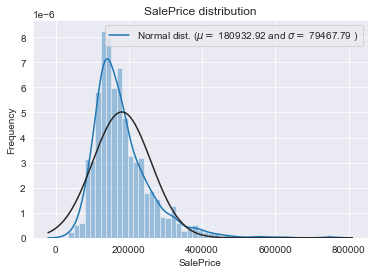

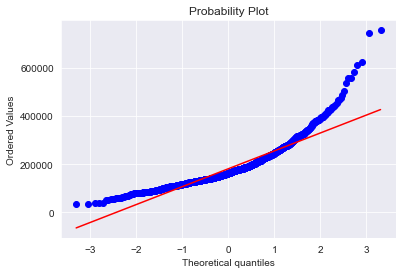


 mu = 12.02 and sigma = 0.40



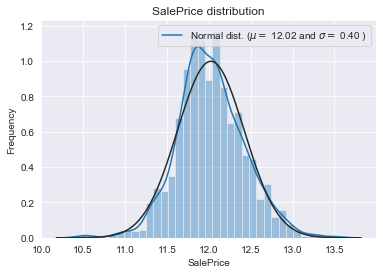

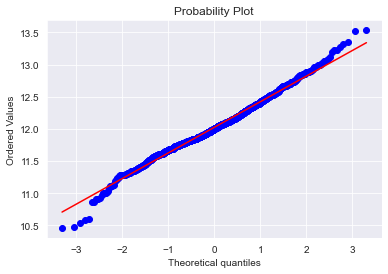

In [3]:
# import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()



# Normalize target variable
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

#Check the new distribution 
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()


In [4]:
ntrain = df_train.shape[0]
y_train = df_train.SalePrice.values
X = df_train
y = df_train["SalePrice"]
df_train.drop(['SalePrice'], axis=1, inplace=True)
print("df_train size is : {}".format(df_train.shape))



#Check remaining missing values if any 
df_train_na = (df_train.isnull().sum() / len(df_train)) * 100
df_train_na = df_train_na.drop(df_train_na[df_train_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :df_train_na})
missing_data.head()

df_train size is : (1458, 78)


,Missing Ratio


In [5]:
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)
# print (skewness)


Skew in numerical features: 



,Skew
MiscVal,24.434913
PoolArea,15.932532
Condition2,13.676313
LotArea,12.560986
3SsnPorch,10.286510
Heating,9.838030
LowQualFinSF,8.995688
RoofMatl,8.122579
MiscFeature,5.007791
LandSlope,4.805032


In [6]:
skewness = skewness[abs(skewness.Skew) > 0.75]
# print(skewness)

print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df_train[feat] = boxcox1p(df_train[feat], lam)

There are 49 skewed numerical features to Box Cox transform


In [7]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error



# df_train.drop("SalePrice", axis=1, inplace = True)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.115, random_state=0)

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score



#Validation function
n_folds = 5




lasso = make_pipeline(RobustScaler(), Lasso(alpha =.0001, random_state=1))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0 = 2.5)


#Getting Mean Squared Error
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df_train.values)
    rmse= np.sqrt(-cross_val_score(model, df_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)
lasso_mse_score = rmsle_cv(lasso)
ridge_mse_score = rmsle_cv(KRR)

#Getting Mean Absolute Error
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df_train.values)
    rmse= np.sqrt(-cross_val_score(model, df_train.values, y_train, scoring="neg_mean_absolute_error", cv = kf))
    return(rmse)
lasso_mae_score = rmsle_cv(lasso)
ridge_mae_score = rmsle_cv(KRR)

#Getting Explained Variance
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df_train.values)
    rmse= np.sqrt(cross_val_score(model, df_train.values, y_train, scoring="explained_variance", cv = kf))
    return(rmse)
lasso_explained_variance_score = rmsle_cv(lasso)
ridge_explained_variance_score = rmsle_cv(KRR)

#Getting r2
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df_train.values)
    rmse= np.sqrt(cross_val_score(model, df_train.values, y_train, scoring="r2", cv = kf))
    return(rmse)
lasso_r2_score = rmsle_cv(lasso)
ridge_r2_score = rmsle_cv(KRR)






print("Lasso:")
print("Mean Squared Error (MSE): {:.4f} - Standard Deviation: ({:.4f})".format(lasso_mse_score.mean(), lasso_mse_score.std()))
print("Mean Absolute Error (MAE): {:.4f} - Standard Deviation: ({:.4f})".format(lasso_mae_score.mean(), lasso_mae_score.std()))
print("Explained Variance score: {:.4f} - Standard Deviation: ({:.4f})".format(lasso_explained_variance_score.mean(), lasso_explained_variance_score.std()))
print("r2 score: {:.4f} - Standard Deviation: ({:.4f})\n".format(lasso_r2_score.mean(), lasso_r2_score.std()))


print("Ridge:")
print("Mean Squared Error (MSE): {:.4f} - Standard Deviation: ({:.4f})".format(ridge_mse_score.mean(), ridge_mse_score.std()))
print("Mean Absolute Error (MAE): {:.4f} - Standard Deviation: ({:.4f})".format(ridge_mae_score.mean(), ridge_mae_score.std()))
print("Explained Variance score: {:.4f} - Standard Deviation: ({:.4f})".format(ridge_explained_variance_score.mean(), ridge_explained_variance_score.std()))
print("r2 score: {:.4f} - Standard Deviation: ({:.4f})\n".format(ridge_r2_score.mean(), ridge_r2_score.std()))








Lasso:
Mean Squared Error (MSE): 0.1195 - Standard Deviation: (0.0052)
Mean Absolute Error (MAE): 0.2914 - Standard Deviation: (0.0021)
Explained Variance score: 0.9541 - Standard Deviation: (0.0036)
r2 score: 0.9539 - Standard Deviation: (0.0036)

Ridge:
Mean Squared Error (MSE): 0.1664 - Standard Deviation: (0.0076)
Mean Absolute Error (MAE): 0.3424 - Standard Deviation: (0.0092)
Explained Variance score: 0.9087 - Standard Deviation: (0.0102)
r2 score: 0.9083 - Standard Deviation: (0.0103)

